# Name: Goutham Neravetla
# Twitter account distinction
### Twitter accounts: @naval, @paulg, @nntaleb

## 1. Retrieve Data

In [6]:
import tweepy
import pickle

from twitter_keys import consumer_key, consumer_secret, access_token, access_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)
naval_tweets = api.user_timeline('naval')
paul_tweets = api.user_timeline('paulg')
nntaleb_tweets = api.user_timeline('nntaleb')


with open('naval_tweets.pkl', 'wb') as f:
    pickle.dump(naval_tweets, f)
with open('paul_tweets.pkl', 'wb') as f:
    pickle.dump(paul_tweets, f)
with open('nntaleb_tweets.pkl','wb') as f:
    pickle.dump(nntaleb_tweets, f)  

## 2. Read from Pickled Files

In [13]:
import pickle 
with open('naval_tweets.pkl', 'rb') as f:
    naval = pickle.load(f)
with open('paul_tweets.pkl', 'rb') as f:
    paul = pickle.load(f)
with open('nntaleb_tweets.pkl','rb') as f:
    nntaleb = pickle.load(f)

## 3. Average number of likes

I am looping through each tweet of an account, addup all the likes while keeping track of number of tweets using a counter. Then get the average likes per tweet and store it in a dictionary. Do this for every account.

In [46]:
likes = 0
tweet_count = 0
likedict = {}
for tweet in naval:
    likes = likes + tweet.favorite_count
    tweet_count = tweet_count + 1
likedict['naval'] = likes/tweet_count
print(tweet.author.name, "Avg Likes/tweet: " ,likes/tweet_count)
likes = 0
tweet_count = 0
for tweet in paul:
    likes = likes + tweet.favorite_count
    tweet_count = tweet_count + 1
likedict['paul'] = likes/len(paul)
print(tweet.author.name, "Avg Likes/tweet: " ,likes/tweet_count)
likes = 0
tweet_count = 0
for tweet in nntaleb:
    likes = likes + tweet.favorite_count
    tweet_count = tweet_count + 1
likedict['nntaleb'] = likes/len(nntaleb)
print(tweet.author.name, "Avg Likes/tweet: " ,likes/tweet_count)

Naval Avg Likes/tweet:  67.6
Paul Graham Avg Likes/tweet:  255.15
Nassim Nicholas Taleb Avg Likes/tweet:  103.85


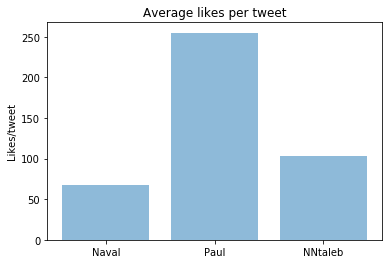

In [47]:
import matplotlib.pyplot as plt
import numpy as np
objects = ('Naval', 'Paul', 'NNtaleb')
y_pos = np.arange(len(objects))
performance = [likedict.get('naval'),likedict.get('paul'),likedict.get('nntaleb')]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Likes/tweet')
plt.title('Average likes per tweet')
plt.show()

## 4. Average positive Sentiment per tweet

I am looping through each tweet of an account, addup all the positive sentiment scores while keeping track of number of tweets using a counter. Then get the average positive score per tweet and store it in a dictionary. Do this for every account.

In [48]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
sentdict = {}
tweet_count = 0
posscore = 0
for tweet in naval:
    sentiment = analyser.polarity_scores(tweet.text)
    posscore = posscore + sentiment.get('pos')
    tweet_count = tweet_count + 1
sentdict['naval'] = posscore/tweet_count
print("Avg positive sentiment per naval tweet: " , posscore/tweet_count)
tweet_count = 0
posscore = 0
for tweet in paul:
    sentiment = analyser.polarity_scores(tweet.text)
    posscore = posscore + sentiment.get('pos')
    tweet_count = tweet_count + 1
sentdict['paul'] = posscore/tweet_count
print("Avg positive sentiment per paul tweet: " , posscore/tweet_count)
tweet_count = 0
posscore = 0
for tweet in nntaleb:
    sentiment = analyser.polarity_scores(tweet.text)
    posscore = posscore + sentiment.get('pos')
    tweet_count = tweet_count + 1
sentdict['nntaleb'] = posscore/tweet_count
print("Avg positive sentiment per nntaleb tweet: " , posscore/tweet_count)

Avg positive sentiment per naval tweet:  0.12069999999999999
Avg positive sentiment per paul tweet:  0.1442
Avg positive sentiment per nntaleb tweet:  0.10075


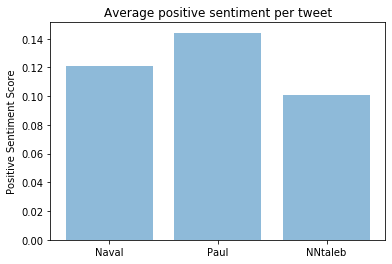

In [50]:
import matplotlib.pyplot as plt
import numpy as np
objects = ('Naval', 'Paul', 'NNtaleb')
y_pos = np.arange(len(objects))
performance = [sentdict.get('naval'),sentdict.get('paul'),sentdict.get('nntaleb')]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Positive Sentiment Score')
plt.title('Average positive sentiment per tweet')
plt.show()

## Conclusion

One of the best distinctions i discovered between the three twitter accounts is to use a combination of average likes per tweet and positive sentiment scores. Paul Graham has the most favourites and best positive sentiment scores. Naval Ravikant has higher positive sentiment score but lower average likes per tweet than Nassim Taleb. Nassim Taleb has lower positive sentiment score but higher average likers per tweet than Naval Ravikant. This also shows Paul graham is more positive and more popular than Naval and Nassim. Nassim Taleb has more engagement per tweet, but at the same time has less positivity compared to Naval.
